# Solutions for Lab Sheet 2 (COM3502-4502-6502 Speech Processing)

This lab sheet is part of the lecture COM[3502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level3/com3502.html "Open web page for COM3502 module")-[4502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/level4/com4502.html "Open web page for COM4502 module")-[6502](http://www.dcs.shef.ac.uk/intranet/teaching/public/modules/msc/com6502.html "Open web page for COM4502 module") Speech Processing at the [University of Sheffield](https://www.sheffield.ac.uk/ "Open web page of The University of Sheffield"), Dept. of [Computer Science](https://www.sheffield.ac.uk/dcs "Open web page of Department of Computer Science, University of Sheffield").

It is probably easiest to open this Jupyter Notebook with [Google Colab](https://colab.research.google.com/notebooks/intro.ipynb#recent=true "Open in Google Colab") since GitHub's Viewer does not show all details correctly. <a href="https://colab.research.google.com/github/sap-shef/SpeechProcesssingLab/blob/main/Lab-Sheet-Solutions/Lab-Sheet-2-Solution.ipynb"><img align="right" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open Notebook in Google Colab" title="Open and Execute the Notebook directly in Google Colaboratory"></a>

Please put questions, comments and correction suggestions in the [Blackboard](https://vle.shef.ac.uk) discussion board or send an email to [s.goetze@sheffield.ac.uk](mailto:s.goetze@sheffield.ac.uk).

In [3]:
# Let's do the ususal necessary and nice-to-have imports
%matplotlib inline
import matplotlib.pyplot as plt  # plotting
import seaborn as sns; sns.set() # styling
import numpy as np               # math

## Task 1 - Generate sine wave

In [4]:
def get_sine_wave(frequency_hz, length_s=1, sample_rate_hz=8000):
    """
    Return a sine wave with given parameters.
    
    Parameters
    ----------
    frequency_hz : float
        frequency $f$ of the sinus to be generated 
    length_s : float, optional
        length of the sine signal to be generated, default: 1 sec.
    sample_rate_hz : float, optional
        sampling frequency $f_s$, default: 8000 Hz

    Returns
    -------
    signal
        generated sinus signal
    """
    time_points = np.linspace(0, length_s,
                              int(length_s * sample_rate_hz),
                              endpoint=False)
    return np.sin(2 * np.pi * frequency_hz * time_points)

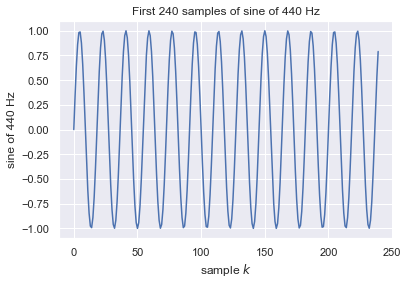

In [5]:
concert_pitch = get_sine_wave(440, 2, 8000)
# Look at the first 30 ms (240 / 8000 = 0.03 s) of the generated wave
plt.plot(concert_pitch[:240])
plt.xlabel('sample $k$')
plt.ylabel('sine of 440 Hz')
plt.title('First 240 samples of sine of 440 Hz')
None # This command does nothing but prevents printing the result of previous function call

In [6]:
# listen to the sound file 
from IPython import display as ipd
ipd.Audio(concert_pitch, rate=8000, normalize=False)

We can concatenate signals to form a longer signal.
As an example we want to create a new signal with half the concert pitch frequency and then play it 2 times alternating with the concert pitch.

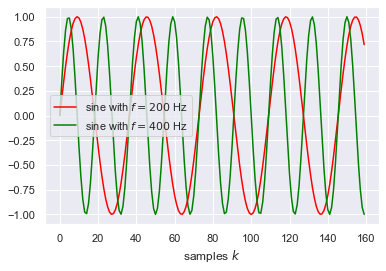

In [7]:
half_concert_pitch = get_sine_wave(220, 2, 8000)
# Look at the first 0.02 s of the signals

plt.plot(half_concert_pitch[:160], "red",label="sine with $f=200$ Hz")
plt.plot(concert_pitch[:160], "green",label="sine with $f=400$ Hz")
plt.xlabel('samples $k$')
plt.legend()

alternation = np.concatenate((half_concert_pitch, concert_pitch,
                              half_concert_pitch, concert_pitch))
ipd.Audio(alternation, rate=8000)

We can observe that the blue `concert_pitch` frequency is exactly double the red `half_concert_pitch` frequency.

Adding together two signals gives a signal where both frequencies can be heard.
The resulting signal does not look like a sine wave anymore but we can still clearly see its periodicity.
The periodicity is so promiment because one frequency is a multiple of the other.
If this is not the case it can take much longer for the signal to repeat its pattern.

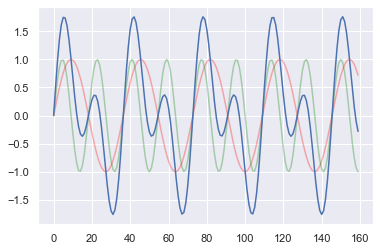

In [8]:
# Look at the first 0.02 s of the signals (which is 160 samples @ 8kHz)
plt.plot(half_concert_pitch[:160], "red", alpha=0.3)
plt.plot(concert_pitch[:160], "green", alpha=0.3)
plt.plot(half_concert_pitch[:160] + concert_pitch[:160])
ipd.Audio(half_concert_pitch + concert_pitch, rate=8000)

## Play a song

By generating sine waves of different lengths and frequencies with `get_sine_wave` you are now able to play simple songs.
What we are missing to do that is a function to generate silence.
Implement the following function `get_silence` to generate an array of 0-values of the desired length.

In [10]:
def get_silence(length_s, sample_rate_hz):
    """Return silence for the given length at the given sample rate."""
    return np.zeros(int(length_s * sample_rate_hz))

In [11]:
def create_tone(note, duration):
    
    tempo = 5

    if note == "Pause":
        return get_silence(length_s=duration*tempo, sample_rate_hz=8000)

    note_position = {
        "C": -9,
        "C#": -8,
        "D": -7,
        "D#": -6,
        "E": -5,
        "F": -4,
        "F#": -3,
        "G": -2,
        "G#": -1,
        "A": 0,
        "A#": 1,
        "B": 2,
    }

    octave = int(note[-1])
    key = note[:-1]

    frequency_hz = 440 * 2 ** ((note_position[key] / 12) + (octave - 4))

    return get_sine_wave(
        frequency_hz=frequency_hz, length_s=duration*tempo, sample_rate_hz=8000
    )

In [9]:
right_hand_notes = [
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("G#4", 1 / 16),
    ("B4", 1 / 16),
    ("C4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("D#5", 1 / 16),
    ("E5", 1 / 16),
    ("B4", 1 / 16),
    ("D5", 1 / 16),
    ("C5", 1 / 16),
    ("A4", 1 / 8),
    ("Pause", 1 / 16),
    ("C4", 1 / 16),
    ("E4", 1 / 16),
    ("A4", 1 / 16),
    ("B4", 1 / 8),
    ("Pause", 1 / 16),
    ("E4", 1 / 16),
    ("C5", 1 / 16),
    ("B4", 1 / 16),
    ("A4", 1 / 4),
]

left_hand_notes = [
    ("Pause", 1 / 8),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 3 / 16),
    ("Pause", 3 / 8),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("A3", 1 / 16),
    ("Pause", 3 / 16),
    ("E2", 1 / 16),
    ("E3", 1 / 16),
    ("G#3", 1 / 16),
    ("Pause", 3 / 16),
    ("A2", 1 / 16),
    ("E3", 1 / 16),
    ("B3", 1 / 16),
    ("Pause", 1 / 16),
]

In [12]:
right_hand, left_hand = None, None  # Prefill values

# Uncomment and fill song details
right_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in right_hand_notes]
)

# Uncomment and fill song details
left_hand = np.concatenate(
    [create_tone(note, duration) for note, duration in left_hand_notes]
)

In [13]:
if left_hand is not None and right_hand is not None:
    song = left_hand + right_hand
    ipd.display(ipd.Audio(song, rate=8000))